In [2]:

# imports
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import minmax_scale
import seaborn as sns

%matplotlib inline
plt.style.use('dark_background')

%load_ext autoreload

%autoreload 2

In [3]:
root_folder = Path.cwd().parent.parent
data_folder = Path(root_folder).joinpath('data', 'external')

In [4]:
from src.data.task_1_food_security.dataset import Dataset

In [5]:
df = get_urbanization(root_folder)

In [6]:
df

,adm1_name,year,value
42,Dakar,2013,96.400000
43,Diourbel,2013,16.100000
44,Fatick,2013,16.100000
45,Kaffrine,2013,15.800000
46,Kaolack,2013,35.500000
...,...,...,...
135,Saint-Louis,2019,48.046854
136,Sédhiou,2019,20.000000
137,Tambacounda,2019,23.551357
138,Thies,2019,52.014436


In [ ]:
x_mat,  y_mat = get_dataset(root_folder)

In [446]:
x_scaled = np.array([minmax_scale(xx, feature_range=(-1,1)) for xx in x_mat])

/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/site-packages/sklearn/preprocessin

Text(0.5, 1.0, 'Scaled')

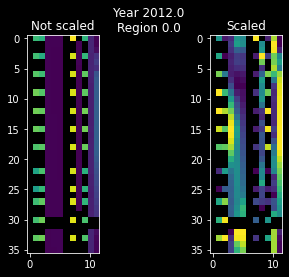

In [447]:
fig, ax = plt.subplots(1,2)
fig.suptitle(f'Year {y_mat[0,0]}\nRegion {y_mat[0,1]}')
ax[0].imshow(x[0])
ax[0].set_title('Not scaled')
ax[1].imshow(x_scaled[0])
ax[1].set_title('Scaled')


In [293]:
df_x, df_y = get_dataset_df(root_folder)

In [294]:
df_x.head()


,adm2_name_code,variable,value,season,season_day
0,29,SPI - 3 months,-1.743,2011,260
1,29,SPI - 3 months,-1.261,2011,270
2,29,SPI - 3 months,-0.222,2011,280
3,29,SPI - 3 months,-0.966,2012,60
4,29,SPI - 3 months,0.633,2012,70


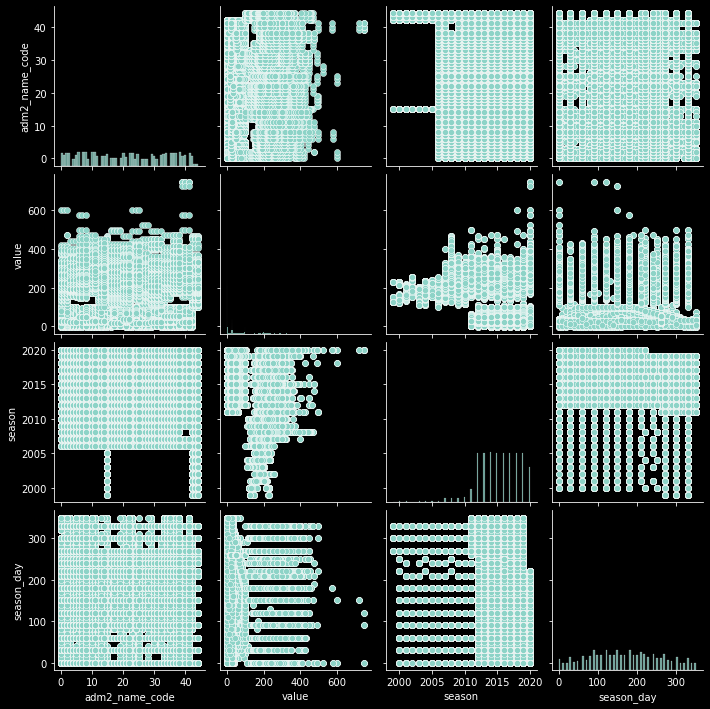

In [298]:
sns.pairplot(data=df_x)

In [310]:
temp = df_x[df_x['season'] == 2019].copy()

In [311]:
len(temp)

23535

In [314]:
# sns.stripplot(x="variable", y="value", hue="adm2_name_code",
#               data=temp[::10], dodge=True, alpha=.25, zorder=1)

In [448]:
x_scaled.shape


(405, 36, 12)

In [449]:
x_regr = x_scaled.copy()

In [450]:
print(x_regr.shape)

x_regr = np.swapaxes(x_regr, 1,2)
x_regr = x_regr.reshape(405, 36*12)

x_regr.shape

(405, 36, 12)


(405, 432)

In [235]:
pd.DataFrame(ds.z_mat.astype(int), columns=['year', 'adm2_name'])

,year,adm2_name
0,2012,0
1,2012,1
2,2012,2
3,2012,3
4,2012,4
...,...,...
400,2020,40
401,2020,41
402,2020,42
403,2020,43


In [232]:
ds.df_y

[autoreload of src.data.task_1_food_security.dataset failed: Traceback (most recent call last):
  File "/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "

,adm2_name_code,variable,season,value
0,0,severity,2013,1.439991
1,1,severity,2013,1.399998
2,2,severity,2013,1.309990
3,3,severity,2013,2.210003
4,4,severity,2013,1.320012
...,...,...,...,...
292,1,severity,2019,1.190002
293,44,severity,2019,1.360000
294,15,severity,2019,1.120000
295,35,severity,2019,1.280000


In [ ]:
df_y.drop('variable', axis=1, inplace=True)

In [431]:
df_y.set_index(['season', 'adm2_name_code'], inplace=True)

In [440]:
gt = np.empty((405,1), dtype=np.float64)
i = 0
for z in y:
    try:
        # gt[i] = df_y[(df_y['season'] == int(z[0,0])) & (df_y['adm2_name_code'] == int(z[0,1])) ]['value'].values
        gt[i] = df_y.xs((int(z[0,0]),int(z[0,1]))).values[0]

    except KeyError:
        continue
    i += 1

In [453]:
x_regr = np.nan_to_num(x_regr, nan=0)

In [ ]:
gt = gt.ravel()

In [454]:
from sklearn.model_selection import RandomizedSearchCV


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]  # Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2,
                               random_state=42, n_jobs=-1)  # Fit the random search model
rf_random.fit(x_regr, gt)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 23.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [455]:
rf_random.best_score_


-4.022880051251923

In [456]:
rf_random.predict(x_regr[0])

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.04182524  0.          0.          0.19907632  0.          0.
  0.5893537   0.          0.          0.9961974   0.          0.
  1.          0.          0.          0.84790844  0.          0.
  0.467681    0.          0.          0.         -0.76425797  0.
  0.         -1.          0.          0.19011419  0.          0.
  0.28136894  0.          0.          0.71482897  0.          0.
 -0.86013967  0.          0.         -1.          0.          0.
 -0.19114208  0.          0.          0.344056    0.          0.
  0.7606842   0.          0.          0.47785553  0.          0.
  0.52136713  0.          0.          0.          0.10256419  0.
  0.         -0.41414085  0.          0.64102566  0.          0.
  0.967366    0.          0.          1.          0.          0.
 -0.7451923  -0.65865386 -0.71634614 -0.82211536 -0.7932692  -0.8269231
 -0.84134614 -0.7307692  -0.52884614 -0.24038461  0.08653846  0.34134614
  0.5673077   0.7932692   0.9423077   1.          0.97115386  0.875
  0.7307692   0.5         0.25480768  0.00480769 -0.22115384 -0.3221154
 -0.3653846  -0.3846154  -0.375      -0.40865386 -0.375      -0.41346154
  0.          0.         -1.         -0.75       -0.6105769  -0.6105769
  0.04583333  0.11904762 -0.3922619  -0.6422619  -0.62976193 -0.73452383
 -0.9047619  -0.97261906 -1.         -0.8440476  -0.6440476  -0.5184524
 -0.41607141 -0.23869048 -0.01547619  0.13571429  0.10297619 -0.00119048
 -0.0452381  -0.05416667 -0.04345238 -0.02619048 -0.02083333 -0.02619048
 -0.025      -0.05059524 -0.06011905 -0.07976191 -0.01785714  0.03809524
  0.          0.          1.          0.96428573  0.52380955  0.29761904
 -0.04214559 -0.0132626  -0.44886532 -0.6864132  -0.6616564  -0.72944295
 -0.8697318  -0.930445   -1.         -0.91511935 -0.89920425 -0.8420277
 -0.78603005 -0.72649574 -0.67285585 -0.6280578  -0.59033304 -0.5585028
 -0.5249042  -0.48305336 -0.4429708  -0.40347776 -0.3716475  -0.34335396
 -0.2932508  -0.24020042 -0.16592985  0.14176245  0.32272324  0.2820513
  0.          0.          1.          0.9764221   0.79958737  0.5873858
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  1.          0.          0.         -0.85095745  0.          0.
 -0.8425197   0.          0.         -0.72440946  0.          0.
 -0.8425197   0.          0.         -0.8425197   0.          0.
 -0.68503934  0.          0.          0.         -1.          0.
  0.         -0.8425197   0.         -0.5669283   0.          0.
 -0.3996063   0.          0.         -0.6948819   0.          0.
  0.         -0.03476246  0.0585168   1.          0.5660487  -0.7247972
 -0.3557358   0.11355736 -0.03070684 -0.0359212   0.05156431 -0.23580533
 -0.7178447  -0.7862109  -0.50579375 -0.6500579  -0.45307067 -0.48088065
 -0.5011588  -0.5840093  -0.46465817 -0.22190034 -0.04345307 -0.05214369
  0.21958286 -0.5903824  -0.585168   -0.6506373  -1.          0.
  0.          0.          0.          0.          0.          0.
 -0.81659395  0.          0.         -0.64291996  0.          0.
  0.6244536   0.          0.          0.56331825  0.          0.
  1.          0.          0.          0.9650648   0.          0.
  0.8253262   0.          0.          0.         -1.          0.
  0.         -0.83406156  0.         -0.7065503   0.          0.
  0.03930095  0.          0.          0.17903888  0.          0.
  0.7495304   1.          0.9731997   0.5564183   0.5882279   0.7590482
  0.35228553 -0.20100188 -0.68390733 -0.77608013 -0.7495304  -0.77608013
 -0.78008765 -0.78008765 -0.78008765 -0.6252974  -0.7350031  -0.4845335
 -0.27514088 -0.17495304 -0.03694427 -0.01765811 -0.10006262 -0.78008765
 -0.62680024 -0.7370069  -1.         -0.49154666 -0.529618    0.22179087
  0.          0.          0.7227301   0.7227301   0.7227301   0.7227301
 -0.9955823  -1.         -0.81507593 -0.06518172  0.14255339 -0.15977003
  0.69627285  0.8592116   0.91302913  0.9372439   0.95346963  0.9660415
  0.9745053   0.9828453   0.9896989   0.9949217   1.          0.99923617
  0.99578875  0.94116616  0.8153443   0.69034815  0.5889475   0.506064
  0.4285272   0.33835658  0.23899962  0.13792926  0.03855165 -0.00880443
  0.          0.         -0.80242145 -0.9262822  -0.9675691  -0.9675691 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [458]:

df_x['variable'].unique()

array(['SPI - 3 months', 'Water Satisfaction Index (WSI)',
       'NDVI - zscore', 'NDVI', 'NDVI Cumulated - zscore', 'Temperature',
       'Rainfall', 'urbanization', 'Maize', 'Millet', 'Rice', 'Sorghum',
       'Groundnuts'], dtype=object)

In [7]:
from src.data.task_1_food_security.dataset import Dataset

In [406]:
ds = Dataset(root_folder=root_folder)

In [403]:
ds.interpolate = False
ds.prepare_dataset_array()

  0%|          | 0/315 [00:00<?, ?it/s]/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)
100%|██████████| 315/315 [00:03<00:00, 81.39it/s]


In [404]:
x = ds.x_mat

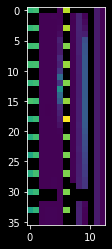

In [405]:
plt.imshow(x[0])

In [401]:
cols = ds.df_x['variable'].unique()
cols.sort()
cols

array(['Maize', 'Millet', 'NDVI', 'NDVI - zscore',
       'NDVI Cumulated - zscore', 'Rainfall', 'Rice', 'SPI - 3 months',
       'Sorghum', 'Temperature', 'Water Satisfaction Index (WSI)',
       'urbanization'], dtype=object)

In [ ]:
df.reset_index(inplace=True)
df.join(ds.df_y.set_index(['season', 'adm2_name_code']), rsuffix='1', lsuffix='0')

In [304]:
df[df['season']<=2019].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204036 entries, 0 to 220496
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   adm2_name_code                  204036 non-null  object 
 1   season                          204036 non-null  object 
 2   season_day                      204036 non-null  int64  
 3   Groundnuts                      0 non-null       float64
 4   Maize                           7174 non-null    float64
 5   Millet                          7310 non-null    float64
 6   NDVI                            29556 non-null   float64
 7   NDVI - zscore                   29556 non-null   float64
 8   NDVI Cumulated - zscore         29556 non-null   float64
 9   Rainfall                        969 non-null     float64
 10  Rice                            7307 non-null    float64
 11  SPI - 3 months                  26928 non-null   float64
 12  Sorghum         

In [253]:
len(df)

297

In [254]:
len(ds.df_y)

297

In [256]:
len(ds.df_x)

220528

In [259]:
df

variable     value
season adm2_name_code                    
2013   0               severity  1.439991
       1               severity  1.399998
       2               severity  1.309990
       3               severity  2.210003
       4               severity  1.320012
...                         ...       ...
2019   1               severity  1.190002
       44              severity  1.360000
       15              severity  1.120000
       35              severity  1.280000
       31              severity  1.154998

[297 rows x 2 columns]

In [305]:
df_asap = pd.read_csv('/home/cajanond/Documents/omdena/GPSDD-Food-Security-Senegal/data/external/asap/unit/asap_data_crop_gaul2.csv')


In [306]:
df_asap.head()

,adm2_name,variable,date,value,year,month,day,yearday,dec_day,season_year,season_dec_day
0,Kebemer,SPI - 3 months,20120101,-0.735,2012,1,1,1,0,2011,260
1,Kebemer,SPI - 3 months,20120111,-1.139,2012,1,11,11,10,2011,270
2,Kebemer,SPI - 3 months,20120121,-0.686,2012,1,21,21,20,2011,280
3,Kebemer,SPI - 3 months,20120201,0.061,2012,2,1,32,30,2011,290
4,Kebemer,SPI - 3 months,20120211,0.245,2012,2,11,42,40,2011,300


In [311]:
rain_fall = df_asap[(df_asap['variable'] == 'Rainfall') & (df_asap['year'] > 2012) & (df_asap['year'] < 2020)]

In [312]:
import seaborn as sns

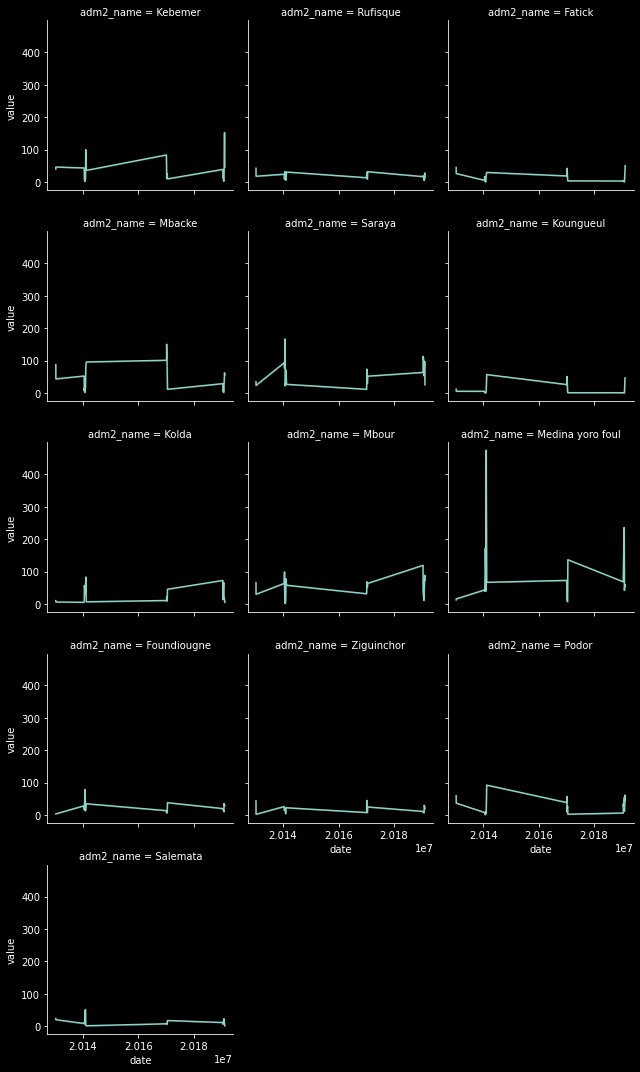

In [313]:
g = sns.FacetGrid(data=rain_fall, col='adm2_name', col_wrap=3)
g.map(sns.lineplot, 'date', 'value')

In [315]:
df_asap = pd.read_csv('/home/cajanond/Documents/omdena/GPSDD-Food-Security-Senegal/data/external/asap/region/SEN_asap_region.csv')

KeyError: 'variable'

In [317]:
df_asap

,region_name,variable_name,sensor_name,class_name,date,value,year,month,day,yearday,dec_day,season_year,season_dec_day
0,Kolda,Temperature,ECMWF,Rangeland during growing cycle,20120101,26.903,2012,1,1,1,0,2011.0,260.0
1,Kolda,Temperature,ECMWF,Rangeland during growing cycle,20120111,27.939,2012,1,11,11,10,2011.0,270.0
2,Kolda,Temperature,ECMWF,Rangeland during growing cycle,20120501,33.000,2012,5,1,122,120,2012.0,20.0
3,Kolda,Temperature,ECMWF,Rangeland during growing cycle,20120511,31.339,2012,5,11,132,130,2012.0,30.0
4,Kolda,Temperature,ECMWF,Rangeland during growing cycle,20120521,31.639,2012,5,21,142,140,2012.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89178,Matam,Rainfall,ECMWF-CHIRPS,Crop during growing cycle,20201011,8.485,2020,10,11,285,280,2020.0,180.0
89179,Matam,Rainfall,ECMWF-CHIRPS,Crop during growing cycle,20201021,1.486,2020,10,21,295,290,2020.0,190.0
89180,Matam,Rainfall,ECMWF-CHIRPS,Crop during growing cycle,20201101,0.949,2020,11,1,306,300,2020.0,200.0
89181,Matam,Rainfall,ECMWF-CHIRPS,Crop during growing cycle,20201111,0.000,2020,11,11,316,310,2020.0,210.0


In [320]:
df_asap['class_name'].unique()

array(['Rangeland during growing cycle', 'Crop during growing cycle',
       'Rangeland', 'Crop'], dtype=object)

In [323]:
df_asap.head()

,region_name,variable_name,sensor_name,class_name,date,value,year,month,day,yearday,dec_day,season_year,season_dec_day
0,Kolda,Temperature,ECMWF,Rangeland during growing cycle,20120101,26.903,2012,1,1,1,0,2011.0,260.0
1,Kolda,Temperature,ECMWF,Rangeland during growing cycle,20120111,27.939,2012,1,11,11,10,2011.0,270.0
2,Kolda,Temperature,ECMWF,Rangeland during growing cycle,20120501,33.000,2012,5,1,122,120,2012.0,20.0
3,Kolda,Temperature,ECMWF,Rangeland during growing cycle,20120511,31.339,2012,5,11,132,130,2012.0,30.0
4,Kolda,Temperature,ECMWF,Rangeland during growing cycle,20120521,31.639,2012,5,21,142,140,2012.0,40.0


In [364]:
rain_fall = df_asap[['region_name', 'year', 'dec_day', 'variable_name', 'value']].copy()
rain_fall = rain_fall[rain_fall['variable_name'] == 'Rainfall']
rain_fall.groupby(['region_name', 'year', 'dec_day']).mean()

value
region_name year dec_day          
Dakar       2012 0         0.25150
                 10        0.00000
                 20        0.53300
                 30        0.00000
                 40        0.00000
...                            ...
Ziguinchor  2020 280      41.47425
                 290       2.25475
                 300       1.16250
                 310       0.00200
                 320       0.00000

[4494 rows x 1 columns]

In [365]:
rain_fall.reset_index(inplace=True)

In [373]:
file_name = '/home/cajanond/Documents/omdena/GPSDD-Food-Security-Senegal/data/external/asap/region/rainfall.csv'

rain_fall.to_csv(file_name)

In [367]:
rain_fall.drop(['index'], axis=1, inplace=True)

In [347]:
rain_fall = rain_fall[['region_name', 'season_year', 'season_dec_day', 'variable_name', 'value']]

In [371]:
rain_fall.columns = ['adm1_name', 'year', 'dec_day', 'variable', 'value']

In [342]:
df3 = pd.read_csv(Path(data_folder).joinpath("asap", "unit", "asap_data_crop_gaul2.csv"))


In [343]:
df3.head()

,adm2_name,variable,date,value,year,month,day,yearday,dec_day,season_year,season_dec_day
0,Kebemer,SPI - 3 months,20120101,-0.735,2012,1,1,1,0,2011,260
1,Kebemer,SPI - 3 months,20120111,-1.139,2012,1,11,11,10,2011,270
2,Kebemer,SPI - 3 months,20120121,-0.686,2012,1,21,21,20,2011,280
3,Kebemer,SPI - 3 months,20120201,0.061,2012,2,1,32,30,2011,290
4,Kebemer,SPI - 3 months,20120211,0.245,2012,2,11,42,40,2011,300


In [349]:
rain_fall.head()

,adm1_name,season,season_dec_day,variable,value
0,Kolda,2011.0,260.0,Rainfall,0.0
1,Kolda,2011.0,270.0,Rainfall,0.0
2,Kolda,2011.0,280.0,Rainfall,0.0
3,Kolda,2011.0,290.0,Rainfall,0.0
4,Kolda,2011.0,300.0,Rainfall,0.0


In [350]:
df = pd.read_csv(Path(data_folder).joinpath("SEN_market_data_aggreg.csv"), index_col=0)

In [5]:
ds = Dataset(root_folder)

FileNotFoundError: [Errno 2] No such file or directory: '/home/cajanond/Documents/omdena/data/external/ipc_current.csv'

In [9]:
df = ds.df_x.copy()

NameError: name 'ds' is not defined

In [10]:
df['adm2_name_code'].unique()

NameError: name 'df' is not defined

In [11]:
df.set_index(['season', 'adm2_name_code', 'variable'], inplace=True)
df.sort_index(inplace=True)

NameError: name 'df' is not defined

In [12]:
df

NameError: name 'df' is not defined

In [13]:
df.reset_index(inplace=True)
sorting = df[['season', 'adm2_name_code', 'variable']]
df_temp = df.drop(['season', 'adm2_name_code', 'variable'], axis=1)
df_temp = df_temp.pivot(columns='season_day', values='value')

NameError: name 'df' is not defined

In [14]:
df_y = ds.df_y


NameError: name 'ds' is not defined

In [15]:
df_y

NameError: name 'df_y' is not defined

In [16]:
sorting.join(df_temp, rsuffix='1')

NameError: name 'sorting' is not defined

In [17]:
df_temp.groupby()

NameError: name 'df_temp' is not defined

In [18]:
df_temp.reset_index(inplace=True)
df_temp.groupby([])


NameError: name 'df_temp' is not defined